In [8]:
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.stattools import medcouple
from scipy.stats import skew
from scipy.stats import gamma

plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
df = pd.read_csv("./outlierDatasets/synthetic.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,outlier
0,0.435518,0.038492,0.551343,0.140049,0.899545,0.588684,0.299706,0.245713,0.367375,0.452970,no
1,0.633197,0.034490,0.319406,0.879141,0.163079,0.184356,0.160583,0.104973,0.294980,0.429709,no
2,0.421558,0.299824,0.602220,0.521654,0.954621,0.547448,0.882898,0.586641,0.840204,0.212529,no
3,0.817491,0.647528,0.046214,0.487270,0.053872,0.817499,0.390589,0.394750,0.736854,0.442689,yes
4,0.291513,0.474018,0.065267,0.410573,0.903696,0.466520,0.196878,0.165370,0.297764,0.467911,no


In [4]:
X = df.iloc[:, 4:6].values
copy_X = df.iloc[:, 2:4]
y = df.iloc[:, -1:].values

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

C:\Users\khodg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,10)
testDis = distReturn.reshape(1,-1)

In [7]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

In [35]:
#gamma
newArr = arr / max(arr)
fit_alpha, fit_loc, fit_beta = gamma.fit(newArr)

In [36]:
print(fit_alpha, fit_loc, fit_beta)

0.7176403391103336 0.030852526925967447 0.10565698242527571


In [41]:
data = gamma.rvs(fit_alpha, fit_loc, fit_beta,size=100)

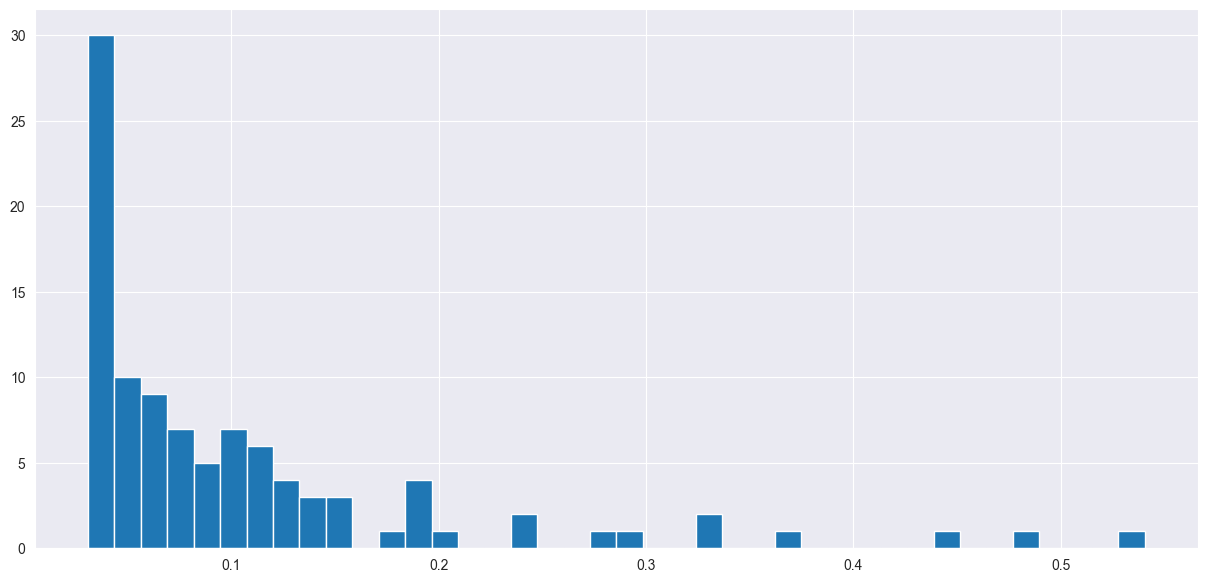

In [42]:
plt.hist(data,bins=40)
plt.show()

In [56]:
print(gamma.interval(.95,fit_alpha, fit_loc, fit_beta))

(0.03139844194797277, 0.3543860164624325)
